# Análise de dados (2013 à 2025)

Algumas hipóteses:

- O número de tratamentos oncológicos aumentou ao longo dos anos no Brasil
- Determinados tipos de câncer têm crescimento mais rápido que outros ao longo do tempo
- Houve queda no número de diagnósticos ou tratamentos iniciados em 2020–2021 devido à pandemia de COVID-19
– O número de casos de câncer de mama em homens tem aumentado ao longo dos anos
- O 2º semestre do ano apresenta mais casos de diagnósticos (câncer de mama e proposta)
- Houve um aumento no número de casos de Câncer de Mama em pessoas do sexo Masculino
- Houve aumento no número de casos de câncer de mama em mulheres abaixo dos 40 anos

# Criação do DataFrame

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./datasets/csv/todos-os-anos.csv', dtype=str)
df.head(5)

,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,MUN_DIAG,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,2018,201807,NaN,NaN,21,210330,NaN,NaN,22,221100,...,F,9.0,2726998,NaN,NaN,NaN,C18,06/07/2018,NaN,24/06/1950
1,2018,201812,2018.0,201812.0,26,260960,26.0,261160.0,26,261160,...,F,0.0,2430843,2430843.0,10.0,NaN,C20,10/12/2018,20/12/2018,01/08/1964
2,2018,201801,2020.0,202006.0,35,351150,35.0,352530.0,35,352530,...,M,NaN,2083086,2083086.0,882.0,NaN,C91,17/01/2018,17/06/2020,14/09/1972
3,2018,201804,2019.0,201901.0,35,352680,35.0,352530.0,35,352530,...,M,3.0,2083086,2083086.0,267.0,NaN,C61,30/04/2018,22/01/2019,13/11/1943
4,2018,201807,2018.0,201807.0,35,352680,35.0,352530.0,35,352530,...,F,2.0,2083086,2083086.0,4.0,NaN,C50,21/07/2018,25/07/2018,10/03/1971


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025658 entries, 0 to 5025657
Data columns (total 23 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ANO_DIAGN   int32         
 1   ANOMES_DIA  object        
 2   ANO_TRATAM  float32       
 3   ANOMES_TRA  object        
 4   UF_RESID    object        
 5   MUN_RESID   object        
 6   UF_TRATAM   object        
 7   MUN_TRATAM  object        
 8   UF_DIAGN    object        
 9   MUN_DIAG    object        
 10  TRATAMENTO  object        
 11  DIAGNOSTIC  object        
 12  IDADE       int32         
 13  SEXO        object        
 14  ESTADIAM    object        
 15  CNES_DIAG   object        
 16  CNES_TRAT   object        
 17  TEMPO_TRAT  float32       
 18  CNS_PAC     object        
 19  DIAG_DETH   object        
 20  DT_DIAG     datetime64[ns]
 21  DT_TRAT     datetime64[ns]
 22  DT_NASC     datetime64[ns]
dtypes: datetime64[ns](3), float32(2), int32(2), object(16)
memory usage: 805.2+ MB


In [97]:
df.isnull().sum()

ANO_DIAGN                0
ANOMES_DIA               0
ANO_TRATAM         2081961
ANOMES_TRA         2081961
UF_RESID                 0
MUN_RESID                0
UF_TRATAM                0
MUN_TRATAM         2081961
UF_DIAGN                 0
MUN_DIAG                 0
TRATAMENTO               0
DIAGNOSTIC               0
IDADE                    0
SEXO                     0
ESTADIAM            339635
CNES_DIAG                0
CNES_TRAT          2081961
TEMPO_TRAT          147732
CNS_PAC            5025658
DIAG_DETH                0
DT_DIAG                  0
DT_TRAT            2081961
DT_NASC                  0
UF_RESID_SIGLA           0
UF_DIAGN_SIGLA           0
UF_TRATAM_SIGLA          0
dtype: int64

Definir tipo das colunas:

In [6]:
column_types = {
    'ANO_DIAGN': 'int32',
    'ANOMES_DIA': 'object',
    'ANO_TRATAM': 'float32',
    'ANOMES_TRA': 'object',
    'UF_RESID': 'object',
    'MUN_RESID': 'object',
    'UF_TRATAM': 'object',
    'MUN_TRATAM': 'object',
    'UF_DIAGN': 'object',
    'MUN_DIAG': 'object',
    'TRATAMENTO': 'object',
    'DIAGNOSTIC': 'object',
    'IDADE': 'int32',
    'SEXO': 'object',
    'ESTADIAM': 'object',
    'CNES_DIAG': 'object',
    'CNES_TRAT': 'object',
    'TEMPO_TRAT': 'float32',
    'CNS_PAC': 'object',
    'DIAG_DETH': 'object',
    'DT_DIAG': 'datetime64[ns]',
    'DT_TRAT': 'datetime64[ns]',
    'DT_NASC': 'datetime64[ns]',
    # 'UF_RESID_SIGLA': 'object',
    # 'UF_DIAGN_SIGLA': 'object',
    # 'UF_TRATAM_SIGLA': 'object',
}
for col in df.columns:
    df[col] = df[col].astype(column_types[col])

# Nova Coluna - Sigla Estado

In [ ]:
# Lendo o arquivo de estados
estados = pd.read_csv("./data/codigo_estados.csv")

In [77]:
mapa_estados = estados.set_index("Codigo_IBGE")["Sigla"]

# Garante que o índice do mapa é inteiro
mapa_estados.index = mapa_estados.index.astype(int)

mapa_estados

Codigo_IBGE
12    AC
27    AL
16    AP
13    AM
29    BA
23    CE
53    DF
32    ES
52    GO
21    MA
51    MT
50    MS
31    MG
15    PA
25    PB
41    PR
26    PE
22    PI
33    RJ
24    RN
43    RS
11    RO
14    RR
42    SC
35    SP
28    SE
17    TO
Name: Sigla, dtype: object

In [81]:
# Adiciona Código negativo para estados não mapeados
df["UF_TRATAM"] = df["UF_TRATAM"].fillna(-1)

In [83]:
# Garante que a coluna também é inteira
df["UF_RESID"] = df["UF_RESID"].astype(int)
df["UF_DIAGN"] = df["UF_DIAGN"].astype(int)
df["UF_TRATAM"] = df["UF_TRATAM"].astype(float)

In [85]:
df["UF_RESID_SIGLA"] = df["UF_RESID"].map(mapa_estados)
df["UF_DIAGN_SIGLA"] = df["UF_DIAGN"].map(mapa_estados)
df["UF_TRATAM_SIGLA"] = df["UF_TRATAM"].map(mapa_estados)
df["UF_TRATAM_SIGLA"] = df["UF_TRATAM_SIGLA"].fillna('N/A')

In [86]:
df.head(5)

,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,MUN_DIAG,...,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC,UF_RESID_SIGLA,UF_DIAGN_SIGLA,UF_TRATAM_SIGLA
0,2018,201807,NaN,NaN,21,210330,-1.0,NaN,22,221100,...,NaN,NaN,NaN,C18,2018-06-07,NaT,1950-06-24,MA,PI,N/A
1,2018,201812,2018.0,201812.0,26,260960,26.0,261160.0,26,261160,...,2430843.0,10.0,NaN,C20,2018-10-12,2018-12-20,1964-01-08,PE,PE,PE
2,2018,201801,2020.0,202006.0,35,351150,35.0,352530.0,35,352530,...,2083086.0,882.0,NaN,C91,2018-01-17,2020-06-17,1972-09-14,SP,SP,SP
3,2018,201804,2019.0,201901.0,35,352680,35.0,352530.0,35,352530,...,2083086.0,267.0,NaN,C61,2018-04-30,2019-01-22,1943-11-13,SP,SP,SP
4,2018,201807,2018.0,201807.0,35,352680,35.0,352530.0,35,352530,...,2083086.0,4.0,NaN,C50,2018-07-21,2018-07-25,1971-10-03,SP,SP,SP


# Hipótese #1: O número de tratamentos oncológicos aumentou ao longo dos anos no Brasil

In [91]:
diagnosticos_por_ano = df["ANO_DIAGN"].value_counts()
diagnosticos_por_ano

ANO_DIAGN
2023    676260
2022    634099
2024    625024
2021    572345
2019    564334
2020    509493
2018    351557
2017    195621
2016    188630
2015    183025
2013    180668
2014    180218
2025    164384
Name: count, dtype: int64

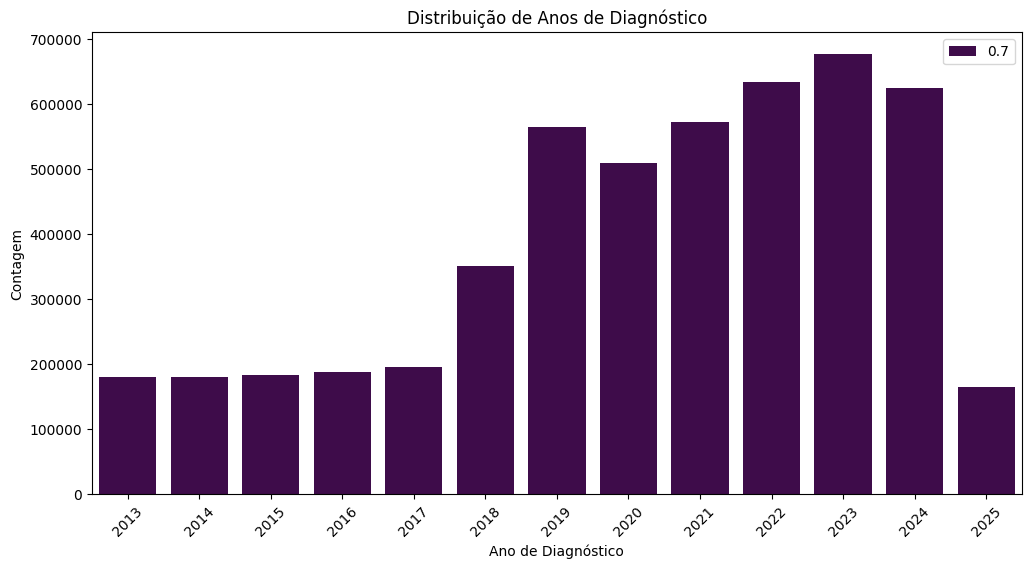

In [92]:
plt.figure(figsize=(12, 6))
sns.barplot(x=diagnosticos_por_ano.index, y=diagnosticos_por_ano.values, palette='viridis', hue=0.7)
plt.title("Distribuição de Anos de Diagnóstico")
plt.xlabel("Ano de Diagnóstico")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()

> **Já é possível observar pelo gráfico que temos uma crescente no número de diagnóstco ao longo dos últimos anos: 3x mais**

# Hipótese #2: Determinados tipos de câncer têm crescimento mais rápido que outros ao longo do tempo

**Dicionário**

- C00 - Neoplasia maligna do lábio
- C01 - Neoplasia maligna da base da língua
- C02 - Neoplasia maligna de outras partes e de partes não especificadas da língua
- C03 - Neoplasia maligna da gengiva
- C04 - Neoplasia maligna do assoalho da boca
- C05 - Neoplasia maligna do palato
- C06 - Neoplasia maligna de outras partes e de partes não especificadas da boca
- C07 - Neoplasia maligna da glândula parótida
- C08 - Neoplasia maligna de outras glândulas salivares maiores e as não especificadas
- C09 - Neoplasia maligna da amígdala
- C10 - Neoplasia maligna da orofaringe
- C11 - Neoplasia maligna da nasofaringe
- C12 - Neoplasia maligna do seio piriforme
- C13 - Neoplasia maligna da hipofaringe
- C14 - Neoplasia maligna de outras localizações e de localizações mal definida, do lábio, cavidade oral
- C15 - Neoplasia maligna do esôfago
- C16 - Neoplasia maligna do estômago
- C17 - Neoplasia maligna do intestino delgado
- C18 - Neoplasia maligna do cólon
- C19 - Neoplasia maligna da junção retossigmóide
- C20 - Neoplasia maligna do reto
- C21 - Neoplasia maligna do ânus e do canal anal
- C22 - Neoplasia maligna do fígado e das vias biliares intra-hepáticas
- C23 - Neoplasia maligna da vesícula biliar
- C24 - Neoplasia maligna de outras partes, e de partes não especificadas das vias biliares
- C25 - Neoplasia maligna do pâncreas
- C26 - Neoplasia maligna de outros órgãos digestivos e de localizações mal definidas no aparelho digestivo
- C30 - Neoplasia maligna da cavidade nasal e do ouvido médio
- C31 - Neoplasia maligna dos seios da face
- C32 - Neoplasia maligna da laringe
- C33 - Neoplasia maligna da traquéia
- C34 - Neoplasia maligna dos brônquios e dos pulmões
- C37 - Neoplasia maligna do timo
- C38 - Neoplasia maligna do coração, mediastino e pleura
- C39 - Neoplasia maligna de outras localizações e de localizações mal definidas do aparelho respiratório
- C40 - Neoplasia maligna dos ossos e cartilagens articulares dos membros
- C41 - Neoplasia maligna dos ossos e das cartilagens articulares de outras localizações e de localizações mal definidas
- C43 - Melanoma maligno da pele
- C44 - Outras neoplasias malignas da pele
- C45 - Mesotelioma
- C46 - Sarcoma de Kaposi
- C47 - Neoplasia maligna dos nervos periféricos e do sistema nervoso autônomo
- C48 - Neoplasia maligna dos tecidos moles do retroperitônio e do peritônio
- C49 - Neoplasia maligna do tecido conjuntivo e de outros tecidos moles
- C50 - Neoplasia maligna da mama
- C51 - Neoplasia maligna da vulva
- C52 - Neoplasia maligna da vagina
- C53 - Neoplasia maligna do colo do útero
- C54 - Neoplasia maligna do corpo do útero
- C55 - Neoplasia maligna do útero, porção não especificada
- C56 - Neoplasia maligna do ovário
- C57 - Neoplasia maligna de outros órgãos genitais femininos e dos não especificados
- C58 - Neoplasia maligna da placenta
- C60 - Neoplasia maligna do pênis
- C61 - Neoplasia maligna da próstata
- C62 - Neoplasia maligna dos testículos
- C63 - Neoplasia maligna de outros órgãos genitais masculinos e dos não especificados
- C64 - Neoplasia maligna do rim, exceto pelve renal
- C65 - Neoplasia maligna da pelve renal
- C66 - Neoplasia maligna dos ureteres
- C67 - Neoplasia maligna da bexiga
- C68 - Neoplasia maligna de outros órgãos urinários e dos não especificados
- C69 - Neoplasia maligna do olho e anexos
- C70 - Neoplasia maligna das meninges
- C71 - Neoplasia maligna do encéfalo
- C72 - Neoplasia maligna da medula espinhal, dos nervos cranianos e de outras partes do sistema nervoso
- C73 - Neoplasia maligna da glândula tireóide
- C74 - Neoplasia maligna da glândula supra-renal [glândula adrenal]
- C75 - Neoplasia maligna de outras glândulas endócrinas e de estruturas relacionadas
- C76 - Neoplasia maligna de outras localizações e de localizações mal definidas
- C77 - Neoplasia maligna secundária e não especificada dos gânglios linfáticos
- C78 - Neoplasia maligna secundária dos órgãos respiratórios e digestivos
- C79 - Neoplasia maligna secundária de outras localizações
- C80 - Neoplasia maligna, sem especificação de localização
- C81 - Doença de Hodgkin
- C82 - Linfoma não-Hodgkin, folicular (nodular)
- C83 - Linfoma não-Hodgkin difuso
- C84 - Linfomas de células T cutâneas e periféricas
- C85 - Linfoma não-Hodgkin de outros tipos e de tipo não especificado
- C88 - Doenças imunoproliferativas malignas
- C90 - Mieloma múltiplo e neoplasias malignas de plasmócitos
- C91 - Leucemia linfóide
- C92 - Leucemia mielóide
- C93 - Leucemia monocítica
- C94 - Outras leucemias de células de tipo especificado
- C95 - Leucemia de tipo celular não especificado
- C96 - Outras neoplasias malignas e as não especificadas dos tecidos linfático, hematopoético e tecidos relacionados
- C97 - Neoplasias malignas de localizações múltiplas independentes (primárias)
- D00 - Carcinoma in situ da cavidade oral, do esôfago e do estômago
- D01 - Carcinoma in situ de outros órgãos digestivos
- D02 - Carcinoma in situ do ouvido médio e do aparelho respiratório
- D03 - Melanoma in situ
- D04 - Carcinoma in situ da pele
- D05 - Carcinoma in situ da mama
- D06 - Carcinoma in situ do colo do útero (cérvix)
- D07 - Carcinoma in situ de outros órgãos genitais e dos não especificados
- D09 - Carcinoma in situ de outras localizações e das não especificadas
- D37 - Neoplasia de comportamento incerto ou desconhecido da cavidade oral e dos órgãos digestivos
- D38 - Neoplasia de comportamento incerto ou desconhecido do ouvido médio e dos órgãos respiratórios
- D39 - Neoplasia de comportamento incerto ou desconhecido dos órgãos genitais femininos
- D40 - Neoplasia de comportamento incerto ou desconhecido dos órgãos genitais masculinos
- D41 - Neoplasia de comportamento incerto ou desconhecido dos órgãos urinários
- D42 - Neoplasia de comportamento incerto ou desconhecido das meninges
- D43 - Neoplasia de comportamento incerto ou desconhecido do encéfalo e do sistema nervoso central
- D44 - Neoplasia de comportamento incerto ou desconhecido das glândulas endócrinas
- D45 - Policitemia vera
- D46 - Síndromes mielodisplásicas
- D47 - Outras neoplasias de comportamento incerto ou desconhecido dos tecidos linfático, hematopoéti
- D48 - Neoplasia de comportamento incerto ou desconhecido de outras localizações e de localizações não especificadas

Fonte dos Dados - [Datasus](http://tabnet.datasus.gov.br/cgi/dhdat.exe?PAINEL_ONCO/PAINEL_ONCOLOGIABR.def)

In [36]:
def incidencia_por_ano(ano):
    return df[df['ANO_DIAGN'] == ano].groupby('DIAG_DETH').size().sort_values(ascending=False).reset_index(name='counts')

In [37]:
incidencia_2013 = incidencia_por_ano(2013)
incidencia_2014 = incidencia_por_ano(2014)
incidencia_2015 = incidencia_por_ano(2015)
incidencia_2016 = incidencia_por_ano(2016)
incidencia_2017 = incidencia_por_ano(2017)
incidencia_2018 = incidencia_por_ano(2018)
incidencia_2019 = incidencia_por_ano(2019)
incidencia_2020 = incidencia_por_ano(2020)
incidencia_2021 = incidencia_por_ano(2021)
incidencia_2022 = incidencia_por_ano(2022)
incidencia_2023 = incidencia_por_ano(2023)
incidencia_2024 = incidencia_por_ano(2024)
incidencia_2025 = incidencia_por_ano(2025)

In [45]:
incidencia_2013.head(5)

,DIAG_DETH,counts
0,C50,41361
1,C61,26684
2,C53,10092
3,C34,8151
4,C18,7902


In [60]:
def generate_barplot(data, title):
    df_incidencia = data.head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='DIAG_DETH', y='counts', data=df_incidencia, palette="viridis", hue="DIAG_DETH")
    plt.title(title)
    plt.xlabel("Tipo de Diagnóstico")
    plt.ylabel("Contagem")
    plt.xticks(rotation=45)
    plt.show()

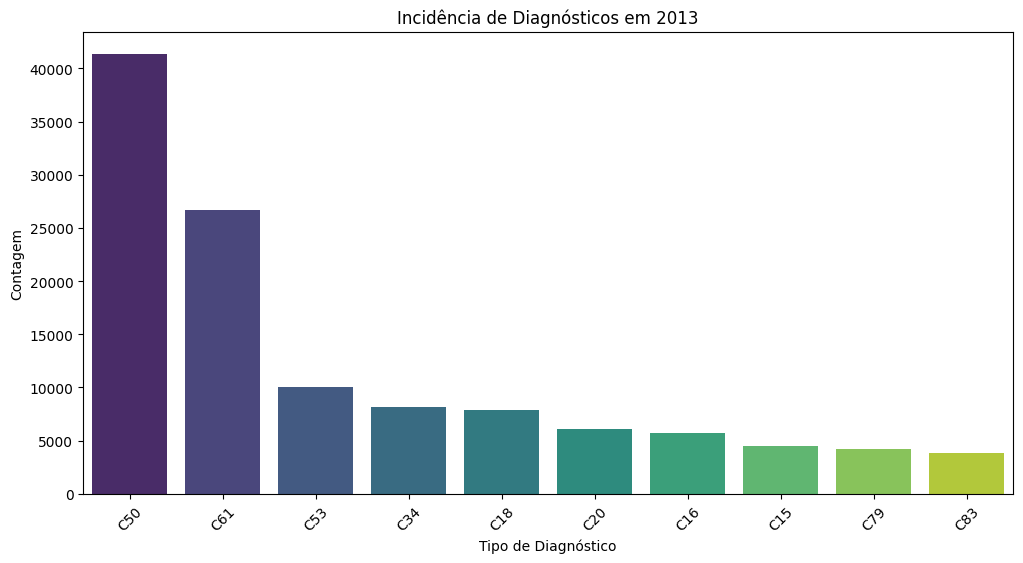

In [61]:
generate_barplot(incidencia_2013, "Incidência de Diagnósticos em 2013")

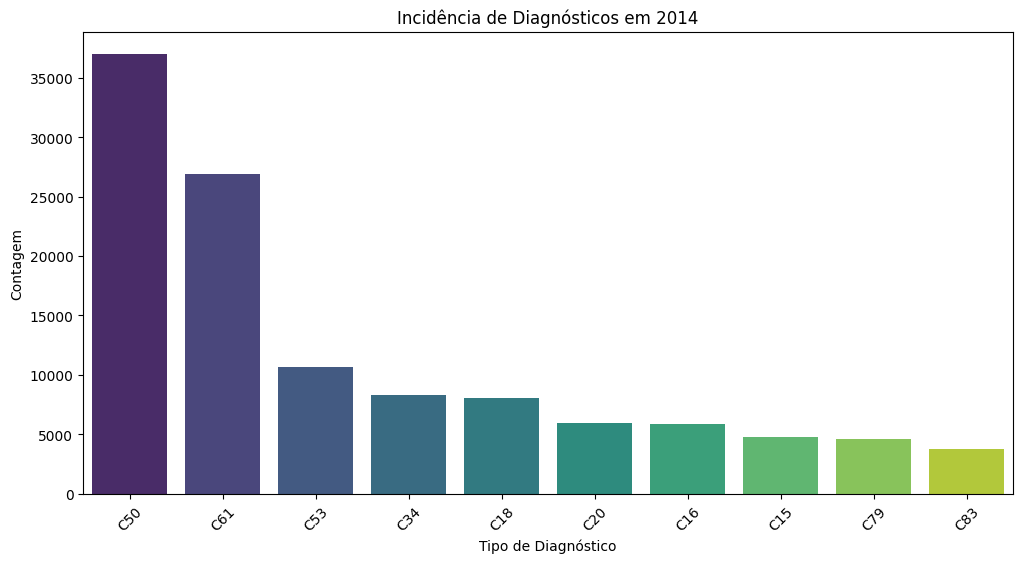

In [62]:
generate_barplot(incidencia_2014, "Incidência de Diagnósticos em 2014")

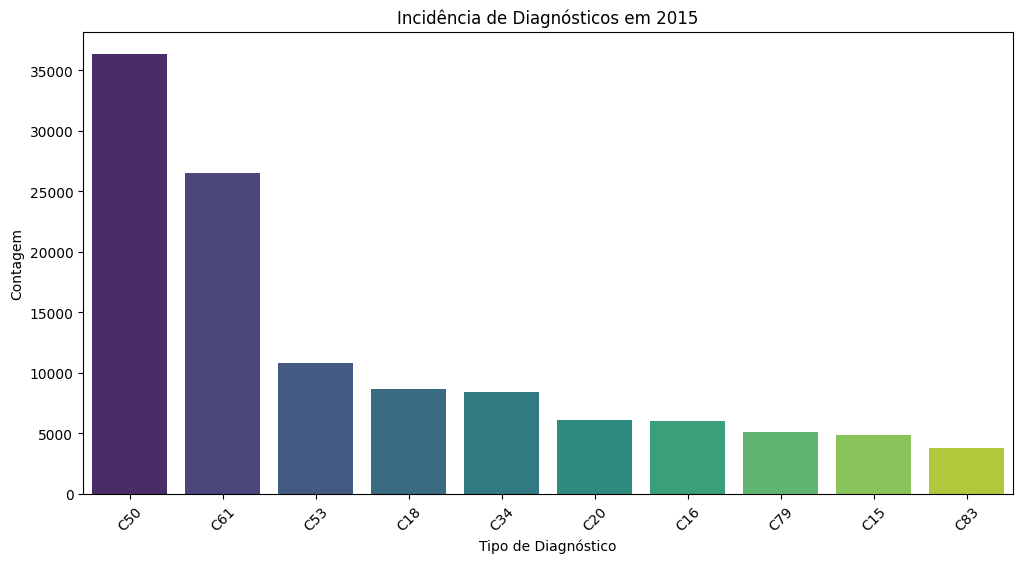

In [63]:
generate_barplot(incidencia_2015, "Incidência de Diagnósticos em 2015")

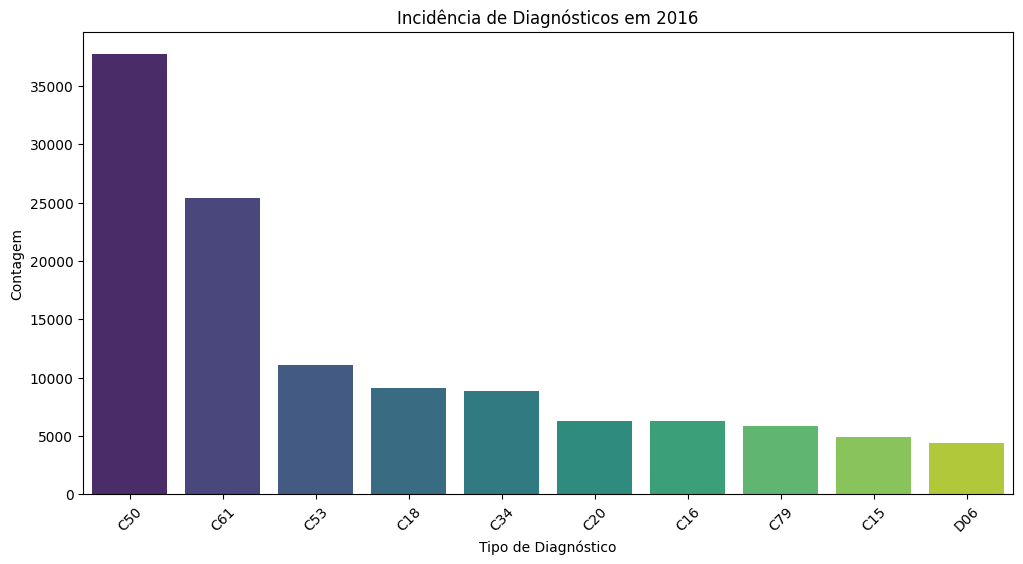

In [64]:
generate_barplot(incidencia_2016, "Incidência de Diagnósticos em 2016")

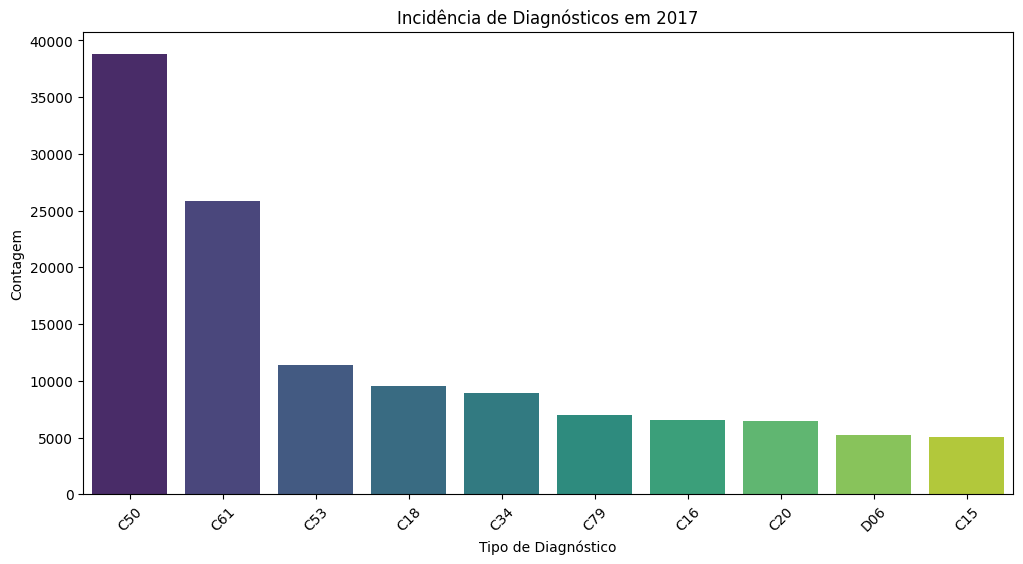

In [65]:
generate_barplot(incidencia_2017, "Incidência de Diagnósticos em 2017")

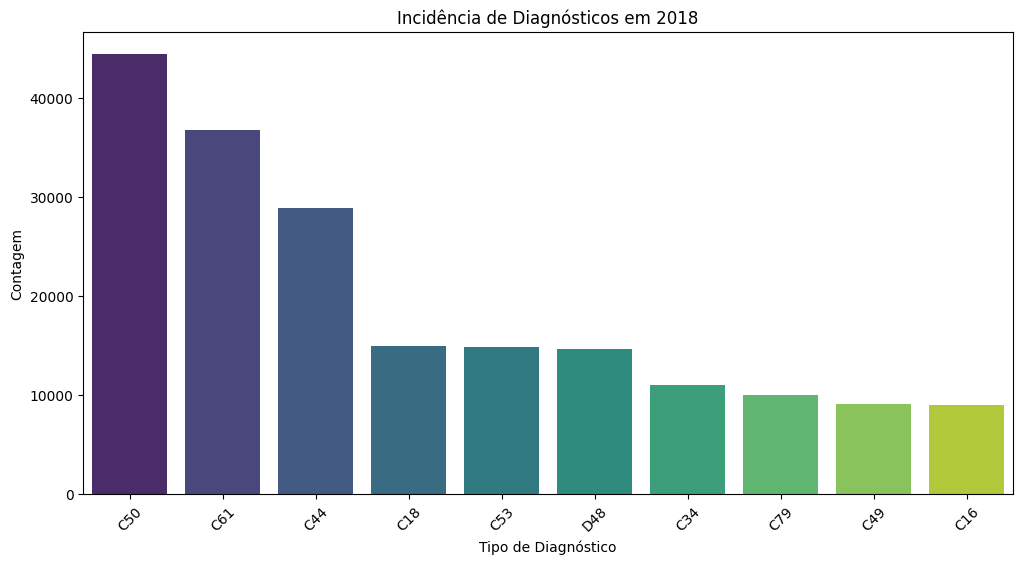

In [66]:
generate_barplot(incidencia_2018, "Incidência de Diagnósticos em 2018")

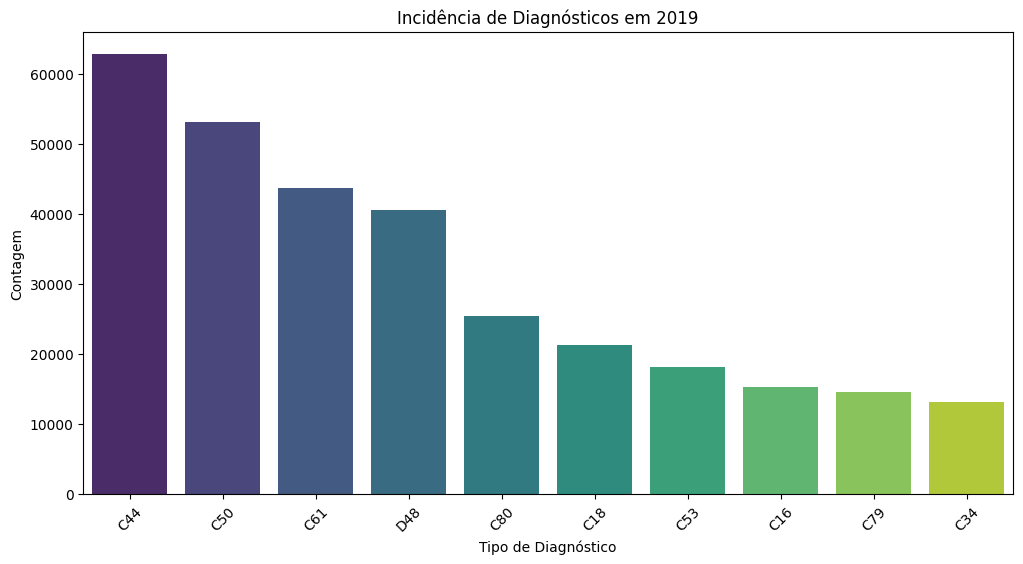

In [67]:
generate_barplot(incidencia_2019, "Incidência de Diagnósticos em 2019")

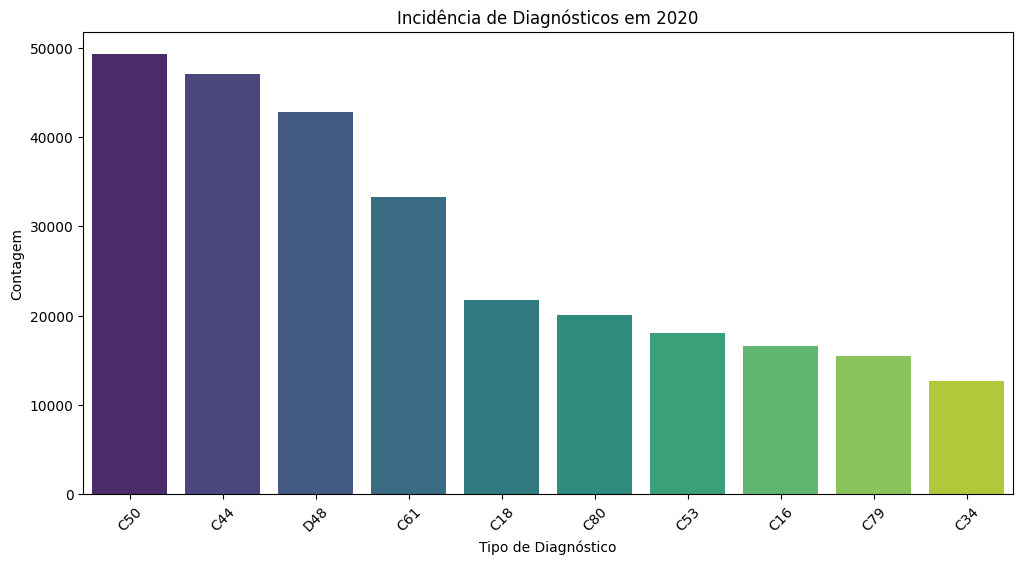

In [68]:
generate_barplot(incidencia_2020, "Incidência de Diagnósticos em 2020")

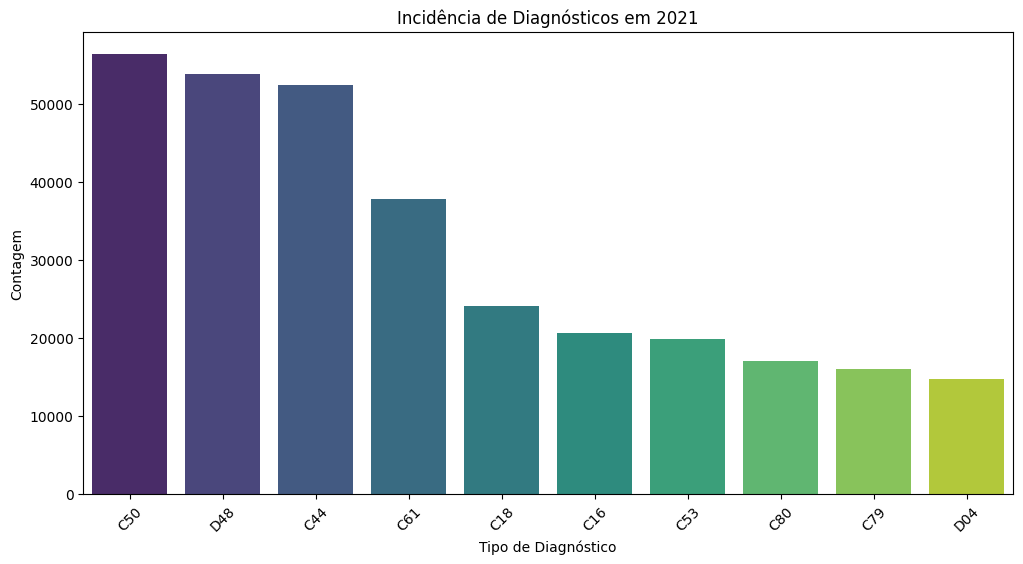

In [69]:
generate_barplot(incidencia_2021, "Incidência de Diagnósticos em 2021")

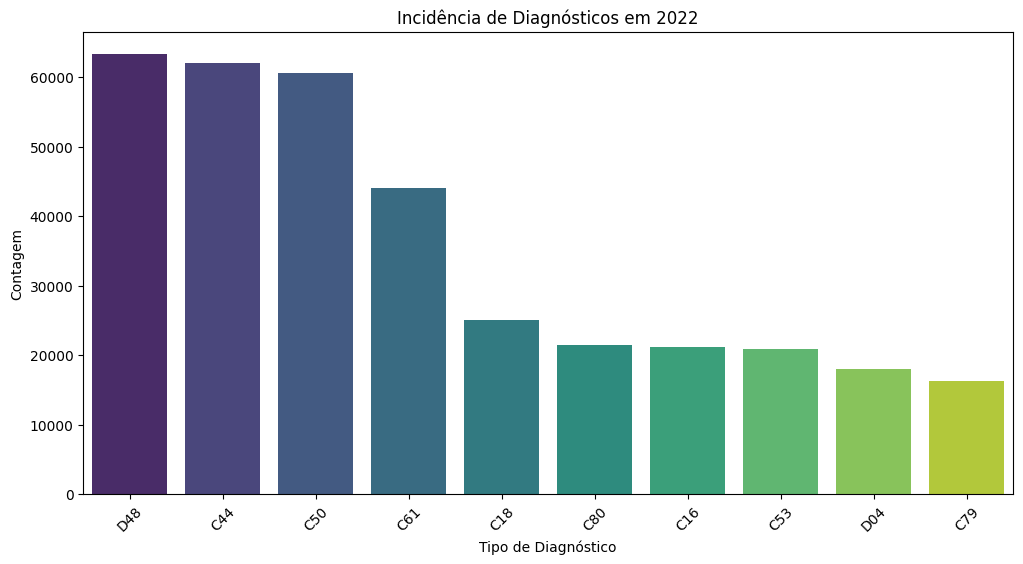

In [70]:
generate_barplot(incidencia_2022, "Incidência de Diagnósticos em 2022")

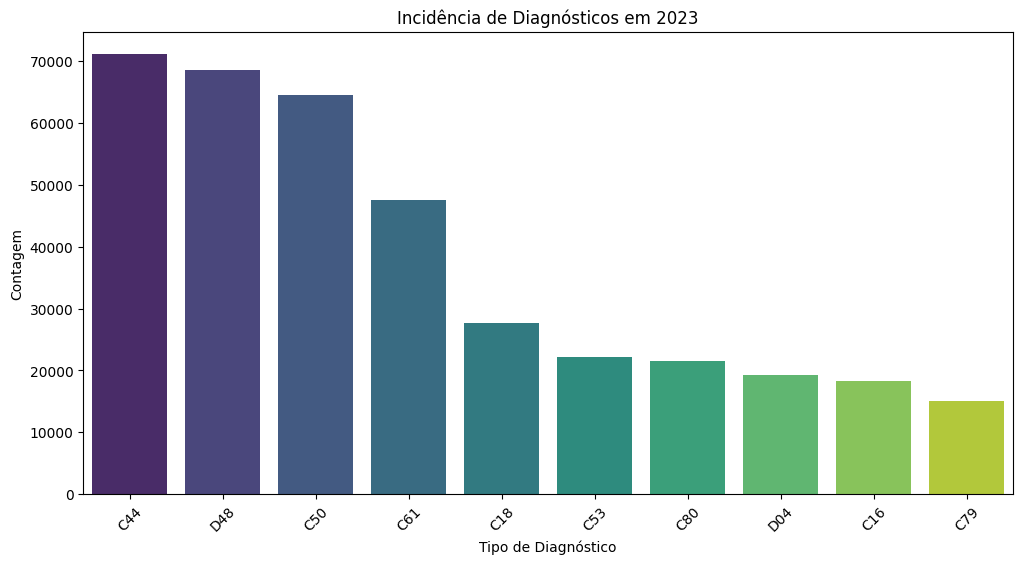

In [71]:
generate_barplot(incidencia_2023, "Incidência de Diagnósticos em 2023")

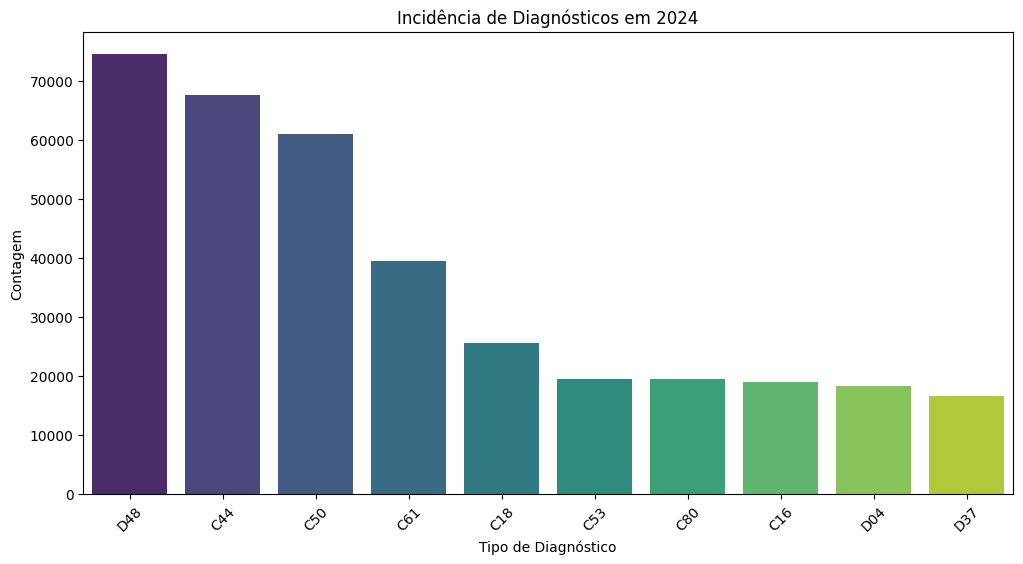

In [72]:
generate_barplot(incidencia_2024, "Incidência de Diagnósticos em 2024")

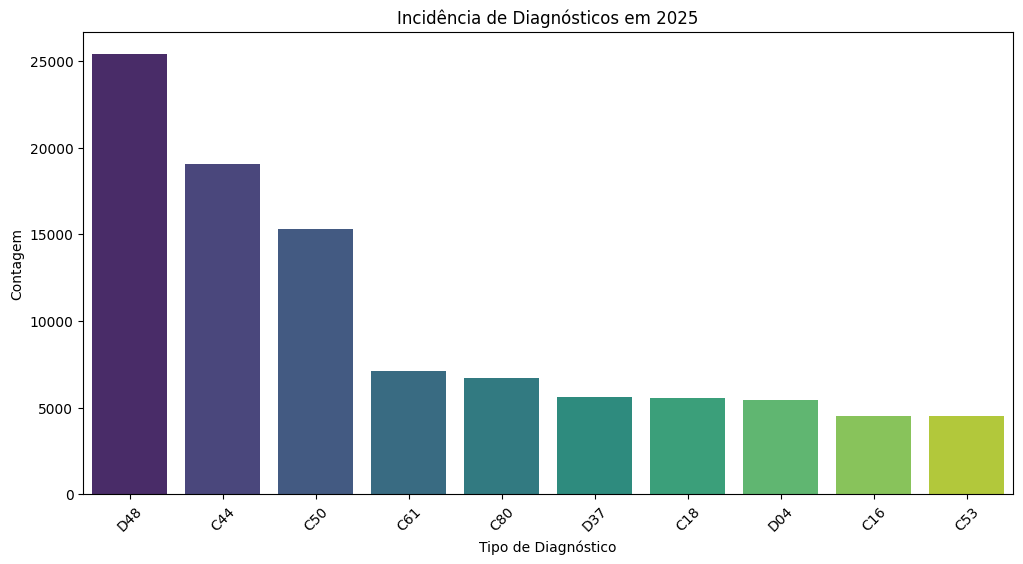

In [73]:
generate_barplot(incidencia_2025, "Incidência de Diagnósticos em 2025")

> A partir de 2018, o câncer de Pele (C44) passou a ter uma maior incidência, estando sempre no top 3. De 2700 casos em 2017 à 28900 em 2018 (aumento de 970,37%)

In [75]:
df[(df["DIAG_DETH"] == "C44") & (df["ANO_DIAGN"] < 2019)].groupby('ANO_DIAGN').size().reset_index(name='counts')

,ANO_DIAGN,counts
0,2013,2952
1,2014,2887
2,2015,2793
3,2016,2733
4,2017,2701
5,2018,28895


In [87]:
def incidencia_por_cancer_agrupado_por_uf(codigo_diagn):
    return df[df['DIAG_DETH'] == codigo_diagn].groupby('UF_RESID_SIGLA').size().sort_values(ascending=False).reset_index(name='counts')

In [88]:
incidencia_por_cancer_agrupado_por_uf("C44")

,UF_RESID_SIGLA,counts
0,SP,101091
1,RS,53022
2,PR,49711
3,MG,47163
4,SC,37699
5,ES,20774
6,RJ,13700
7,CE,13051
8,RN,11915
9,BA,11281


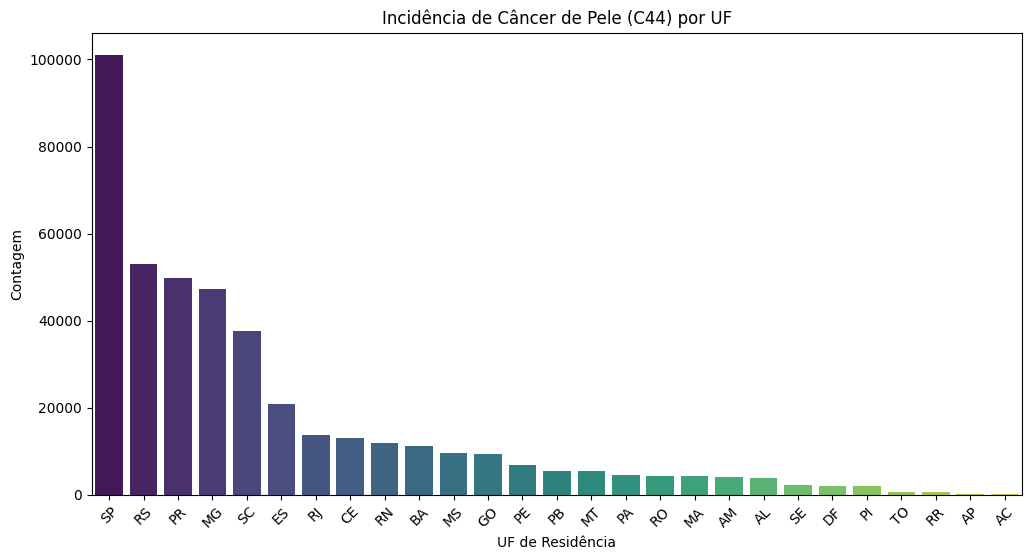

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(x='UF_RESID_SIGLA', y='counts', data=incidencia_por_cancer_agrupado_por_uf("C44"), palette='viridis', hue='UF_RESID_SIGLA')
plt.title("Incidência de Câncer de Pele (C44) por UF")
plt.xlabel("UF de Residência")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()

# Hipótese #3: Houve queda no número de diagnósticos ou tratamentos iniciados em 2020–2021 devido à pandemia de COVID-19

In [93]:
diagnosticos_por_ano = df["ANO_DIAGN"].value_counts()
diagnosticos_por_ano

ANO_DIAGN
2023    676260
2022    634099
2024    625024
2021    572345
2019    564334
2020    509493
2018    351557
2017    195621
2016    188630
2015    183025
2013    180668
2014    180218
2025    164384
Name: count, dtype: int64

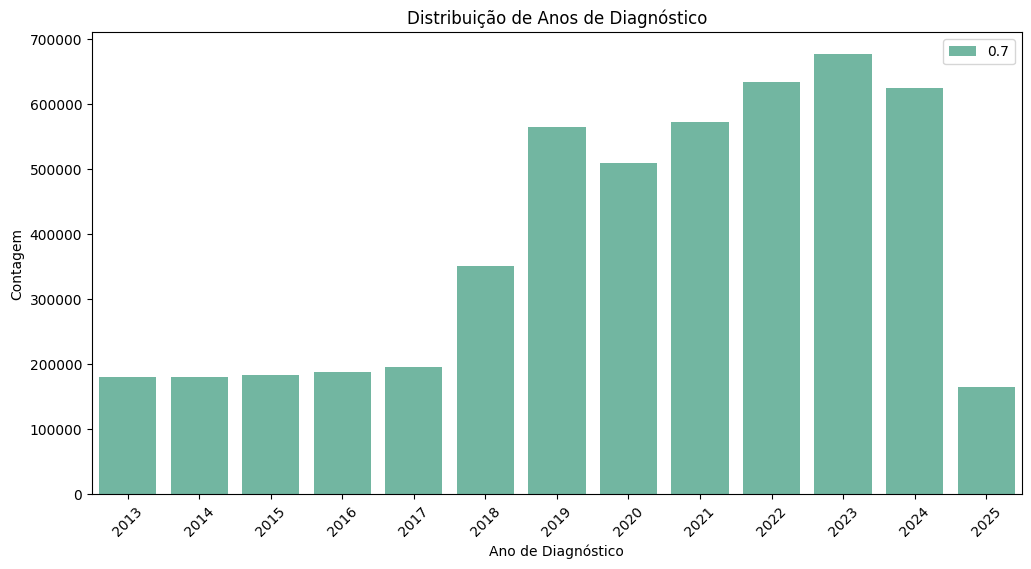

In [95]:
plt.figure(figsize=(12, 6))
sns.barplot(x=diagnosticos_por_ano.index, y=diagnosticos_por_ano.values, palette='Set2', hue=0.7)
plt.title("Distribuição de Anos de Diagnóstico")
plt.xlabel("Ano de Diagnóstico")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()

> **No ano de 2020 houve uma queda, mas leve, no número de diagnósticos oncológicos no BR.**